<a href="https://colab.research.google.com/github/izgg/logisticRegression/blob/main/Ilana_Advertisement_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Pre-processing and EDA
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Data visualization and plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Skitlearn classification algorithms used throughout the notebook
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import SGDClassifier

#Methods to analyze the effectiveness of the models
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
#Load in csv directly from Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
advertisements = pd.read_csv("/content/drive/MyDrive/advertisments.csv")
advertisements.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Exploratory Data Analysis

In [5]:
#Look at the shape of the data.
advertisements.shape

(400, 5)

In [6]:
#Check for nans
advertisements.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
#Documentation
advertisements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


This reveals the structure of the dataset.  There are 400 total datapoints (sample users) with five variables each: their User ID, gender, age, estimated salary, and whether or not they purchased the product after the ad. From the documentation, it can be seen that Gender is a categorical variable, so it will need to be encoded. There are no nans, so no datapoints need to be dropped.

<ipython-input-8-3162c86f9975>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(advertisements.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

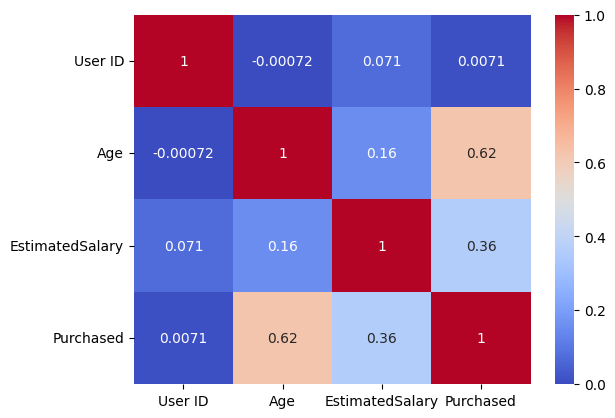

In [8]:
#Check the correlations between features with a heatmap.
sns.heatmap(advertisements.corr(), annot = True, cmap = 'coolwarm')

From the heatmap, it can be seen that the User ID has approx. zero correlation with whether or not an item was purchased, and has neglegable effect on the other features. So, it can be dropped.

In [9]:
#Clean table without User ID

advertisements_clean = advertisements.drop('User ID', axis=1)
advertisements_clean.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Preparation for Logistic Regression: Encoding the Categorical Variables

In [10]:
#Select the features, One-Hot encoding the Gender

X = pd.get_dummies(advertisements_clean['Gender']).join(advertisements_clean['Age']).join(advertisements_clean['EstimatedSalary'])
X.head()

,Female,Male,Age,EstimatedSalary
0,0,1,19,19000
1,0,1,35,20000
2,1,0,26,43000
3,1,0,27,57000
4,0,1,19,76000


In [11]:
#Form the target
y = advertisements['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

# Logistic Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

regular_model = LogisticRegression(solver='liblinear')
regular_model.fit(X_train, y_train)
predictions = regular_model.predict(X_test)

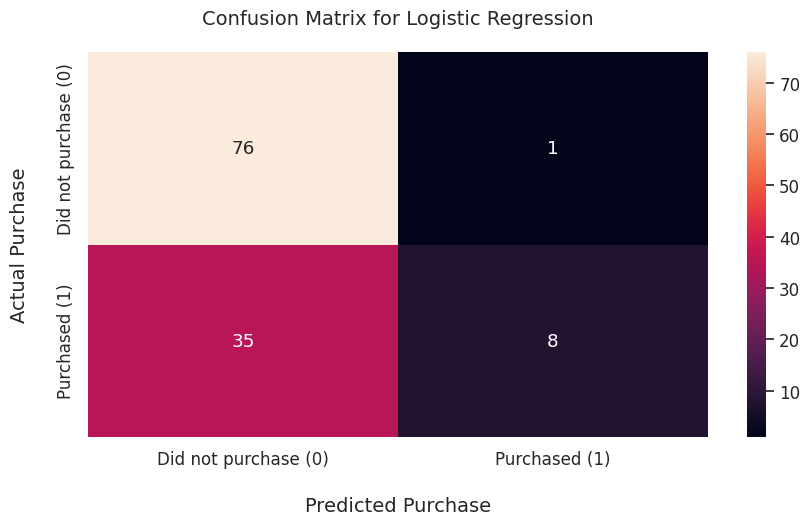

In [15]:
def draw_matrix(test,pred,title):

  conf_matrix = confusion_matrix(test, pred)
  plt.figure(figsize=(10,5), dpi=100)
  sns.set(font_scale = 1.1)
  ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )

  # set x-axis label
  ax.set_xlabel("Predicted Purchase", fontsize=14, labelpad=20)
  ax.xaxis.set_ticklabels(['Did not purchase (0)', 'Purchased (1)'])

  # set y-axis label and ticks
  ax.set_ylabel("Actual Purchase", fontsize=14, labelpad=20)
  ax.yaxis.set_ticklabels(['Did not purchase (0)', 'Purchased (1)'])

  # set plot title
  ax.set_title(title, fontsize=14, pad=20)

  plt.show()

draw_matrix(y_test,predictions,"Confusion Matrix for Logistic Regression")

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81        77
           1       0.89      0.19      0.31        43

    accuracy                           0.70       120
   macro avg       0.79      0.59      0.56       120
weighted avg       0.76      0.70      0.63       120



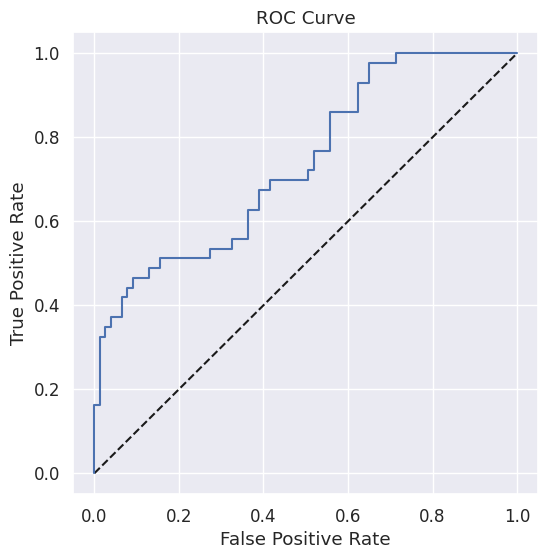

In [28]:
y_scores = regular_model.predict_proba(X_test)
def plot_ROC(yScores,yTest):
  fpr, tpr, thresholds = roc_curve(yTest, yScores[:,1])
  fig = plt.figure(figsize=(6, 6))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()
plot_ROC(y_scores, y_test)

In [29]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.7375415282392026


# Logistic Regression with Standard Scalar

In [30]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

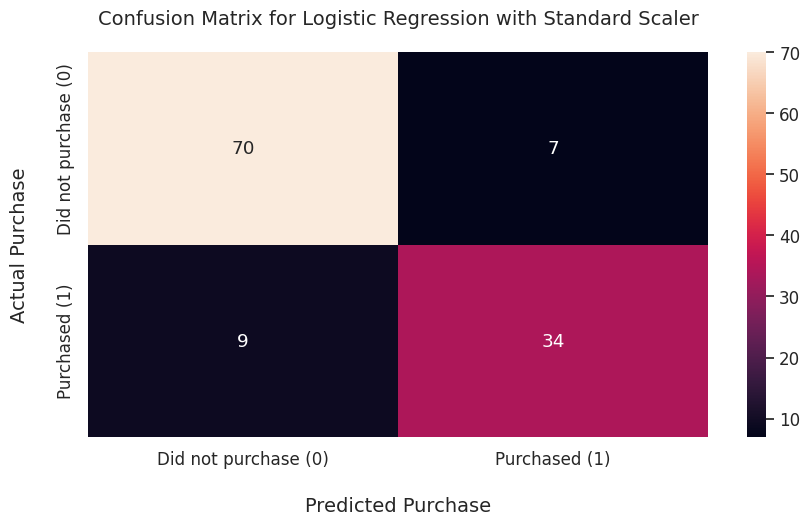

In [57]:
predictions_scaled= model_scaled.predict(X_test_scaled)
draw_matrix(y_test, predictions_scaled, "Confusion Matrix for Logistic Regression with Standard Scaler")

In [60]:
print(classification_report(y_test, predictions_scaled))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        77
           1       0.83      0.79      0.81        43

    accuracy                           0.87       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.87      0.87      0.87       120



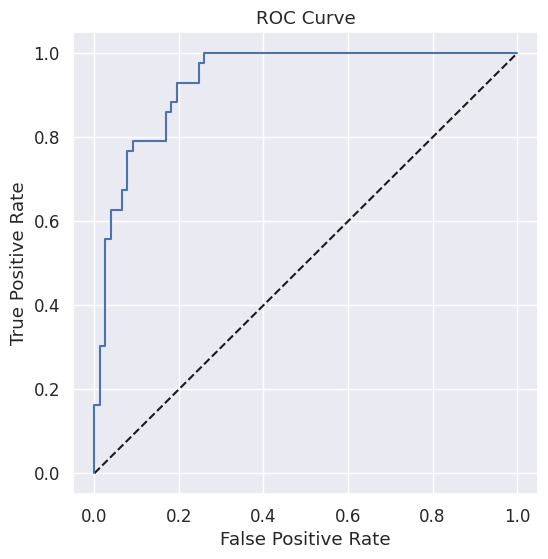

In [34]:
y_scores_scaled = model_scaled.predict_proba(X_test_scaled)
plot_ROC(y_scores_scaled,y_test)

In [35]:
auc = roc_auc_score(y_test,y_scores_scaled[:,1])
print(auc)

0.933856840833585


# Support Vector Classifier with Standard Scalar

In [36]:
model_svc = svm.SVC(probability = True)
model_svc.fit(X_train_scaled, y_train)

SVC(probability=True)

In [37]:
predictions_svc_scaled = model_svc.predict(X_test_scaled)

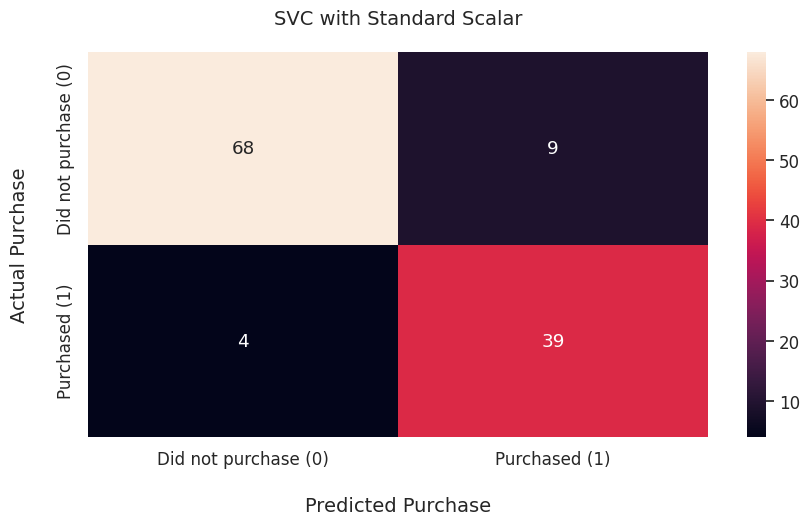

In [38]:
draw_matrix(y_test, predictions_svc_scaled, "SVC with Standard Scalar")

In [62]:
print(classification_report(y_test, predictions_svc_scaled))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        77
           1       0.81      0.91      0.86        43

    accuracy                           0.89       120
   macro avg       0.88      0.90      0.88       120
weighted avg       0.90      0.89      0.89       120



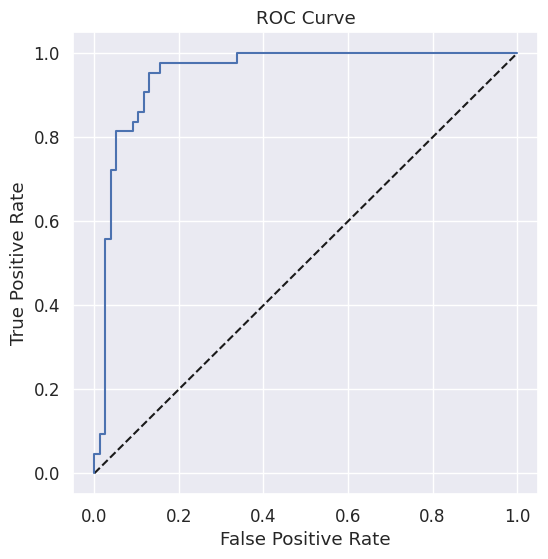

In [43]:
y_scores_svm = model_svc.predict_proba(X_test_scaled)
plot_ROC(y_scores_svm,y_test)

In [44]:
auc = roc_auc_score(y_test,y_scores_svm[:,1])
print(auc)

0.948655995167623


# Stochastic Gradient Descent

In [45]:
model_sgd = SGDClassifier(loss= "log_loss", penalty="elasticnet",max_iter=1000)
model_sgd.fit(X_test_scaled, y_test)

SGDClassifier(loss='log_loss', penalty='elasticnet')

In [46]:
predictions_sgd = model_sgd.predict(X_test_scaled)

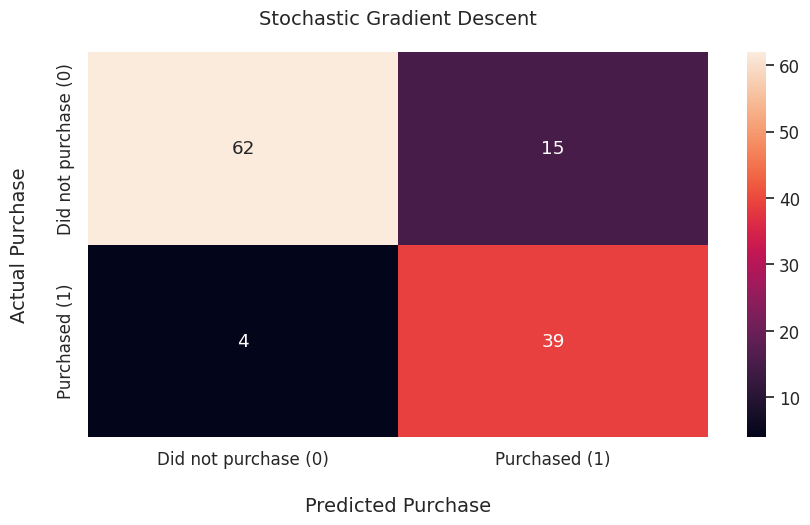

In [47]:
draw_matrix(y_test,predictions_sgd, "Stochastic Gradient Descent")

In [63]:
print(classification_report(y_test, predictions_sgd))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        77
           1       0.72      0.91      0.80        43

    accuracy                           0.84       120
   macro avg       0.83      0.86      0.84       120
weighted avg       0.86      0.84      0.84       120



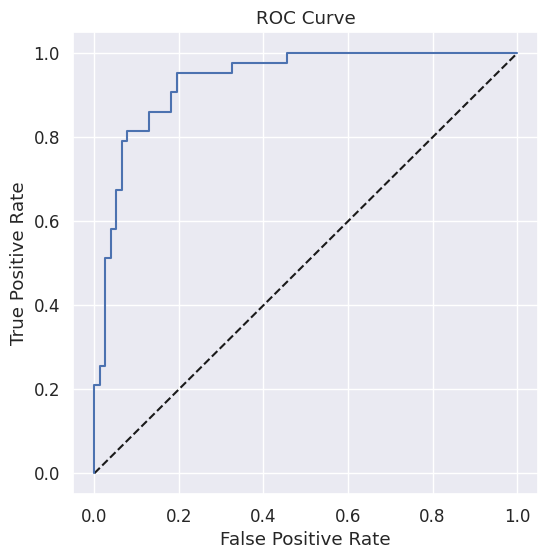

In [49]:
y_scores_sgd = model_sgd.predict_proba(X_test_scaled)
plot_ROC(y_scores_sgd,y_test)

In [50]:
auc = roc_auc_score(y_test,y_scores_sgd[:,1])
print(auc)

0.9341588643914225


# Comparing all four ROC Curves

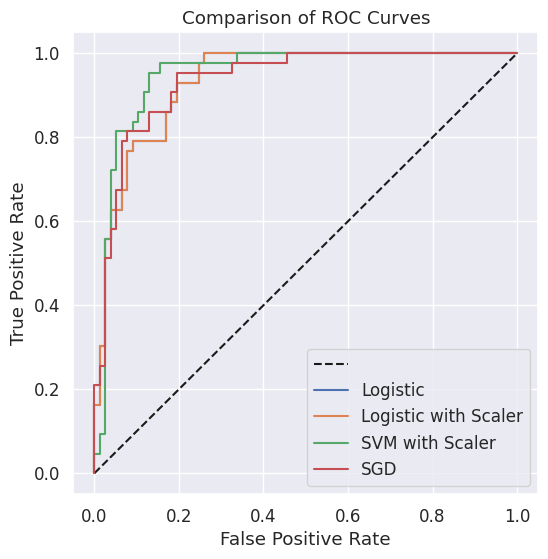

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fpr2, tpr2, thresholds = roc_curve(y_test, y_scores_scaled[:,1])
fpr3, tpr3, thresholds = roc_curve(y_test, y_scores_svm [:,1])
fpr4, tpr4, thresholds = roc_curve(y_test, y_scores_sgd[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot(fpr4, tpr4)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(["","Logistic", "Logistic with Scaler", "SVM with Scaler", "SGD"], loc ="lower right")
plt.show()